In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
import AHM
reload(AHM)
n=0
date = 

In [54]:
k = np.linspace(0, 2*np.pi, 40)

In [459]:
n

39

In [ ]:
n+=1
da=0.2
db=0
dc=-0.2
mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, U=1, muB=0.2, mu=2.8, t=1, inhomp=True, inhomi=True)
vals = mM.Deltra(k, N=50, alpha=0.5)



0 1


c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\AHM.py:142: ComplexWarning: Casting complex values to real discards the imaginary part
  sortedEVals[sum(degen):sum(degen)+d]=inbet[t]


1 0.0
2 0.39910698992405247
3 0.4554322000086422
4 0.4782564537436106
5 0.48892725611705656
6 0.49424313768175393
7 0.49697427814797174
8 0.49839634505066044
9 0.4991286167803584
10 0.4994507006342409
11 0.4993610239520985
12 0.49827807410021635
13 0.49364420192235775
14 0.47614934227040934
15 0.42104922501559094
16 0.3077130584194151
17 0.1818416854822375
18 0.09579796242374257
19 0.04857270082171011
20 0.024372866918365425
21 0.012197335750544774


In [557]:
dels = vals[0]
nus = vals[2]

In [558]:
vals[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.39910699, 0.4554322 , 0.47825645, 0.48892726,
       0.49424314, 0.49697428, 0.49839635, 0.49912862, 0.4994507 ,
       0.49936102, 0.49827807, 0.4936442 , 0.47614934, 0.42104923,
       0.30771306, 0.18184169, 0.09579796, 0.0485727 , 0.02437287,
       0.01219734, 0.00610004])

In [559]:
dels[:,-5:]

array([[ 2.18233544e-06+5.16948799e-21j,  1.09114613e-06+9.09131856e-21j,
         5.45558938e-07+1.58134507e-20j,  2.72770663e-07+2.20144238e-21j,
         1.36379947e-07+1.46510378e-21j],
       [-2.64343181e-10-3.56916872e-21j, -1.59598845e-10+3.59592916e-21j,
        -9.63229287e-11+3.03359741e-21j, -5.81159253e-11-7.08496717e-22j,
        -3.50549505e-11+3.94306057e-22j],
       [-2.18279849e-06-5.15795824e-21j, -1.09142747e-06-7.60003155e-21j,
        -5.45729621e-07+4.04281575e-22j, -2.72874084e-07-2.80279010e-21j,
        -1.36442550e-07-1.31526887e-21j]])

In [560]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]


In [561]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\scf\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {dels[:,0]}, nA, nB, nC={nus[:,0]}, U={mM.U}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n dels: {dels}\nnus: {nus}")
    file.close

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


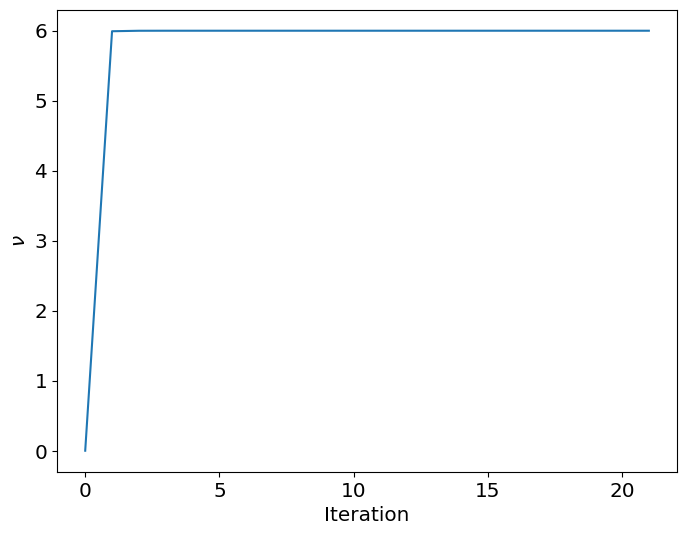

In [562]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(s1)), s1, label = r'no hopping')


#plt.legend()
plt.savefig(newpath+"//nu.png")
plt.show()

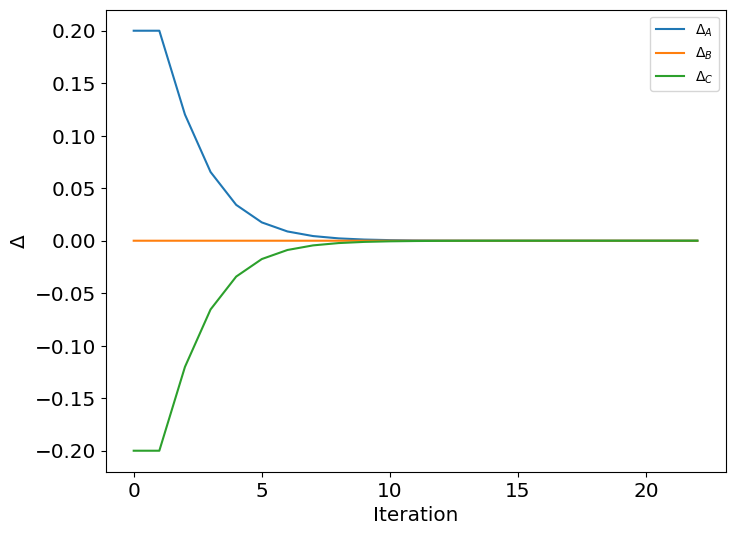

In [563]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')


plt.legend()
plt.savefig(newpath+"//dels.png")

plt.show()

In [564]:
da, db, dc = dels[:,-1]
na, nb, nc = nus[:,-1]
#mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc,mu=0, U=3, t=1, inhomp=False, inhomi=True)
H = mM.HBdG()
k = np.linspace(0, 2*np.pi, 100)

k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = mM.solvHam(kx, ky)

np.shape(energies)
emax = np.amax(energies)
emax = emax+0.1*emax

In [565]:
energies.T

array([[-5.79136646, -5.79136646, -2.3       , ...,  2.3       ,
         5.79136646,  5.79136646],
       [-5.79067005, -5.79067005, -2.3       , ...,  2.3       ,
         5.79067005,  5.79067005],
       [-5.78858263, -5.78858263, -2.3       , ...,  2.3       ,
         5.78858263,  5.78858263],
       ...,
       [-5.78579612, -5.78579612, -2.3       , ...,  2.3       ,
         5.78579612,  5.78579612],
       [-5.78997348, -5.78997348, -2.3       , ...,  2.3       ,
         5.78997348,  5.78997348],
       [-5.79136646, -5.79136646, -2.3       , ...,  2.3       ,
         5.79136646,  5.79136646]])

In [566]:
np.savetxt(newpath +"//dels.txt", dels, delimiter=",")
np.savetxt(newpath +"//nus.txt", nus, delimiter=",")
np.savetxt(newpath +"//energies.txt", energies, delimiter=",")

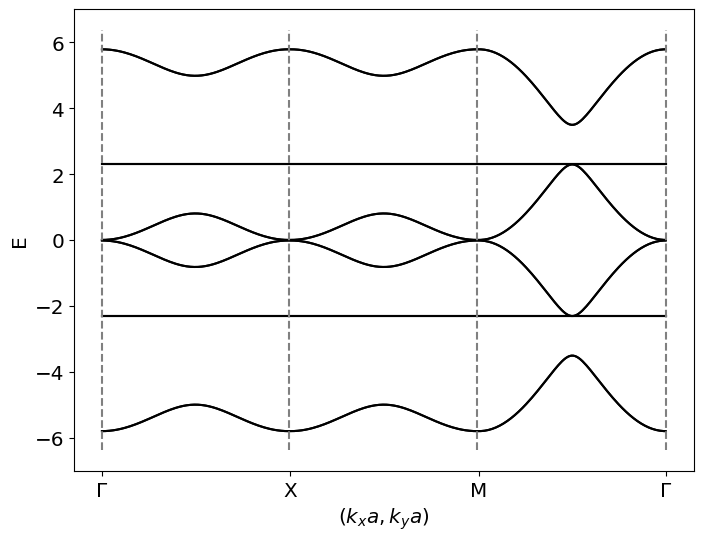

In [567]:
plt.figure(figsize=(8,6))
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-0.5, 0.5))

for i in energies:
    plt.plot(p, i, color='black')
#for i in energies2:
#    plt.plot(p, i, color='green', linestyle='dashdot')
#plt.plot(p, energies4[0], color='black', label=r'$\Delta_0=0.5$')
#plt.plot(p, energies2[0], color='green', linestyle='dashdot', label=r'$\Delta_0=1$')

plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')
#plt.vlines(250, -2, 2)
#plt.legend(fontsize='x-large')
#plt.savefig("Pictures/ESCpath.png")
plt.savefig(newpath+"//bands.png")

plt.show()